# STED analysis Tpr Nup153

## Analysis of circularity and Tpr-Nup153 distances

#### 23/06/21

STED images were segmented with a code written in Matlab. Automatic threshold, watershed segmentation, region properties...

- Nup153 and Tpr circularity
- Nup153 and Tpr centroids
- distances between Nup153 and Tpr centroids (in nm)

*Nota: circularity is calculated as*

**4π x area / (perimeter)^2**

This information is stored in 3 separate txt files.

----

Here the goal is to build histograms from these data and fit them with Gaussians.
=> is the distribution normal ?
=> is it possible to identify several populations ?




In [1]:
%matplotlib inline

9496


(array([0.0033101 , 0.00946574, 0.01416957, 0.01922184, 0.0242741 ,
        0.03281069, 0.0311266 , 0.03484321, 0.03333333, 0.03281069,
        0.03164925, 0.0304878 , 0.02775842, 0.02915215, 0.02363531,
        0.020964  , 0.01660859, 0.01376307, 0.01428571, 0.01080139,
        0.00853659, 0.00760743, 0.0054007 , 0.00499419, 0.00447154,
        0.00238095, 0.00214866, 0.00162602, 0.0014518 , 0.0014518 ,
        0.00110337, 0.0004065 , 0.00069686, 0.00069686, 0.00029036,
        0.00069686, 0.00034843, 0.00063879, 0.00046458, 0.00011614]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
        78., 80.]),
 <BarContainer object of 40 artists>)

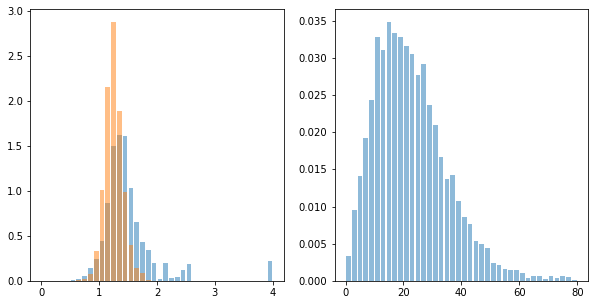

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


TprData=pd.read_csv('/Users/christine/Documents/Data/STED/Pore_analysis_Nup153_Tpr/Data/scrambled/8bit/TprCircularity.txt').values
Nup153Data=pd.read_csv('/Users/christine/Documents/Data/STED/Pore_analysis_Nup153_Tpr/Data/scrambled/8bit/Nup153Circularity.txt').values
distances=pd.read_csv('/Users/christine/Documents/Data/STED/Pore_analysis_Nup153_Tpr/Data/scrambled/8bit/distances.txt').values
print(len(distances))

distData, dData = np.histogram(distances, bins=20, range=(0,80), density=True)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.hist(TprData, bins=40, range=(0,4), density=True, alpha=0.5, rwidth=0.8)
ax1.hist(Nup153Data, bins=30, range=(0,3), density=True, alpha=0.5, rwidth=0.8)

ax2.hist(distances, bins=40, range=(0,80), density=True, alpha=0.5, rwidth=0.8)



Now I need to extract histogram data and fit with Gaussians (1, 2 or 3). Let's start with **distances**.


[ 1.02308036 19.63965594 12.09761731]
[ 0.21811877 12.71048756  5.68234466] [ 0.78145594 23.44256729 11.74516563]
[ 0.40165914 29.96576446 12.40149388] [ 0.38570983 12.44551717  5.89412286] [ 0.21507317 24.35670838  5.82415993]


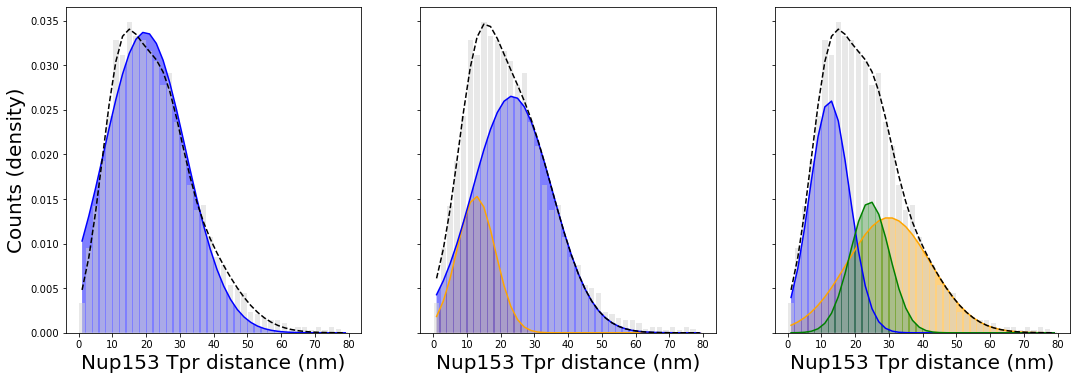

In [59]:
import statistics
import scipy
from scipy import optimize
from statistics import mean
from matplotlib import gridspec

ydata, xdata = np.histogram(distances, bins=40, range=(0,80), density=True)
#print(xdata,ydata)

X = len(xdata)
xcenter = np.empty(X-1)
for j in range (0,X-1):
    xcenter[j] = (xdata[j+1]+xdata[j])/2
    

#print(xcenter.shape, ydata.shape)

# each gaussian is defined by its amplitude, center and sigma


def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

def _3gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2))) + \
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2)))

# This is the fitting procedure, where p0 are the initial guesses, and bounds the acceptable bounds for each parameter 
# defined in _3gaussian



popt_1gauss, pcov_1gauss = scipy.optimize.curve_fit(_1gaussian, xcenter, ydata,\
                bounds = ((0,0,0),\
                            (np.inf, np.inf, 20)))
perr_1gauss = np.sqrt(np.diag(pcov_1gauss))
pars_1 = popt_1gauss[0:3]

popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, xcenter, ydata, \
                bounds = ((0,0,0,0,0,0),\
                            (np.inf, np.inf, 20,np.inf, np.inf, 20)))
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_21 = popt_2gauss[0:3]
pars_22 = popt_2gauss[3:6]

popt_3gauss, pcov_3gauss = scipy.optimize.curve_fit(_3gaussian, xcenter, ydata, \
                bounds = ((0,0,0,0,0,0,0,0,0),\
                            (np.inf, np.inf, 20,np.inf, np.inf, 20,np.inf, np.inf, 20)))
perr_3gauss = np.sqrt(np.diag(pcov_3gauss))
pars_31 = popt_3gauss[0:3]
pars_32 = popt_3gauss[3:6]
pars_33 = popt_3gauss[6:9]


print(pars_1)
print(pars_21, pars_22)
print(pars_31, pars_32, pars_33)


# This calaculates the individual gaussians
gauss_peak_1 = _1gaussian(xcenter, *pars_1)

gauss_peak_21 = _1gaussian(xcenter, *pars_21)
gauss_peak_22 = _1gaussian(xcenter, *pars_22)


gauss_peak_31 = _1gaussian(xcenter, *pars_31)
gauss_peak_32 = _1gaussian(xcenter, *pars_32)
gauss_peak_33 = _1gaussian(xcenter, *pars_33)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharey=True, sharex=True)

ax1.bar(xcenter, ydata, width=1.6, align='center', alpha=0.5,color='lightgrey')
ax1.plot(xcenter, gauss_peak_1, "blue")
ax1.fill_between(xcenter, gauss_peak_1.min(), gauss_peak_1, facecolor="blue", alpha=0.5)
ax1.plot(xcenter, _3gaussian(xcenter, *popt_3gauss), 'k--')
ax1.set_xlabel('Nup153 Tpr distance (nm)', fontsize=20)
ax1.set_ylabel('Counts (density)', fontsize=20)


ax2.bar(xcenter, ydata, width=1.6, align='center', alpha=0.5, color='lightgrey')
ax2.plot(xcenter, gauss_peak_21, "orange")
ax2.fill_between(xcenter, gauss_peak_21.min(), gauss_peak_21, facecolor="orange", alpha=0.5)
ax2.plot(xcenter, gauss_peak_22, "blue")
ax2.fill_between(xcenter, gauss_peak_22.min(), gauss_peak_22, facecolor="blue", alpha=0.5)
ax2.plot(xcenter, _2gaussian(xcenter, *popt_2gauss), 'k--')
ax2.set_xlabel('Nup153 Tpr distance (nm)', fontsize=20)

ax3.bar(xcenter, ydata, width=1.6, align='center', alpha=0.5, color='lightgrey')
ax3.plot(xcenter, gauss_peak_31, "orange")
ax3.fill_between(xcenter, gauss_peak_31.min(), gauss_peak_31, facecolor="orange", alpha=0.5)
ax3.plot(xcenter, gauss_peak_32, "blue")
ax3.fill_between(xcenter, gauss_peak_32.min(), gauss_peak_32, facecolor="blue", alpha=0.5)
ax3.plot(xcenter, gauss_peak_33, "green")
ax3.fill_between(xcenter, gauss_peak_33.min(), gauss_peak_33, facecolor="green", alpha=0.5)
ax3.plot(xcenter, _3gaussian(xcenter, *popt_3gauss), 'k--')
ax3.set_xlabel('Nup153 Tpr distance (nm)', fontsize=20)

plt.savefig('3plots.tif', format='tiff')
plt.savefig('3plots.jpg')


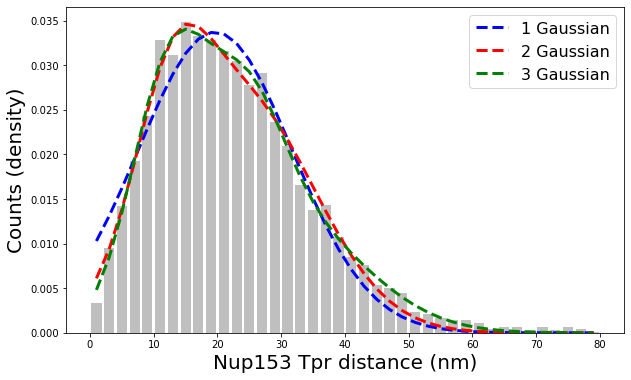

In [58]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(xcenter, ydata, width=1.6, align='center', alpha=0.5, color='grey')
ax1.plot(xcenter, _1gaussian(xcenter, *popt_1gauss), 'b--', linewidth=3, label="1 Gaussian")
ax1.plot(xcenter, _2gaussian(xcenter, *popt_2gauss), 'r--', linewidth=3, label="2 Gaussian")
ax1.plot(xcenter, _3gaussian(xcenter, *popt_3gauss), 'g--', linewidth=3, label="3 Gaussian")
ax1.set_xlabel('Nup153 Tpr distance (nm)', fontsize=20)
ax1.set_ylabel('Counts (density)', fontsize=20)
ax1.legend(fontsize=16)

plt.savefig('MutipleFits.tif', format='tiff')
plt.savefig('MutipleFits.jpg')

Actually, the distances dstribution looks like a lognormal 

    => Try to fit with a lognormal distribution. I found a code (see below).

/Users/christine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


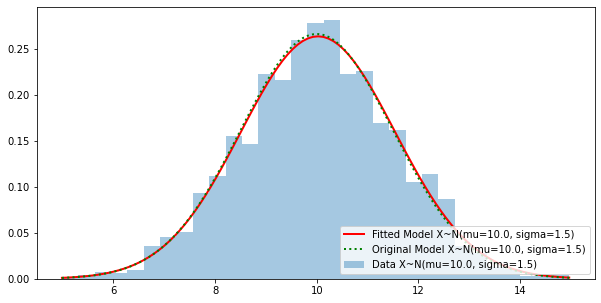

/Users/christine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


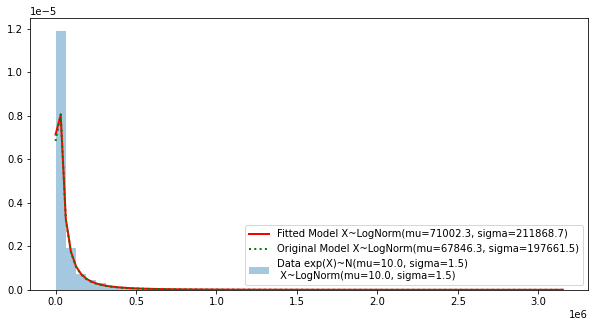

In [65]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu = 10 # Mean of sample !!! Make sure your data is positive for the lognormal example 
sigma = 1.5 # Standard deviation of sample
N = 2000 # Number of samples

norm_dist = scipy.stats.norm(loc=mu, scale=sigma) # Create Random Process
x = norm_dist.rvs(size=N) # Generate samples

# Fit normal
fitting_params = scipy.stats.norm.fit(x)
norm_dist_fitted = scipy.stats.norm(*fitting_params)
t = np.linspace(np.min(x), np.max(x), 100)

# Plot normals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x, ax=ax, norm_hist=True, kde=False, label='Data X~N(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, norm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist_fitted.mean(), norm_dist_fitted.std()))
ax.plot(t, norm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist.mean(), norm_dist.std()))
ax.legend(loc='lower right')
plt.show()


# The lognormal model fits to a variable whose log is normal
# We create our variable whose log is normal 'exponenciating' the previous variable

x_exp = np.exp(x)
mu_exp = np.exp(mu)
sigma_exp = np.exp(sigma)

fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

# Here is the magic I was looking for a long long time
lognorm_dist = scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))
# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x_exp, ax=ax, norm_hist=True, kde=False,
             label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='lower right')
plt.show()

OK, let's trys on our data. 
1. build histogram
2. define lognormal probability density function (pdf)
3. optimize fitting our histogram with the pdf
4. plot results
5. if results look weird, then assign initial conditions.



15 5
(10.592402870021715, 0.00011614401858304281, 0.0807188325804237)


(0.0, 0.04)

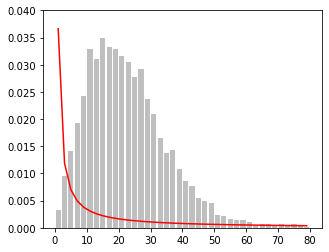

In [131]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import lognorm



ydata, xdata = np.histogram(distances, bins=40, range=(0,80), density=True)
mu= 15 #np.mean(distances)
mu_exp=np.exp(mu)
sigma= 5 #np.std(distances)
print(mu, sigma)

X = len(xdata)
xcenter = np.empty(X-1)
for j in range (0,X-1):
    xcenter[j] = (xdata[j+1]+xdata[j])/2
    
#def pdf(x,mu,sigma):
  #  a = 1 / (x * sigma * np.sqrt(2 * np.pi) )
  #  b = - (np.log(x) - mu) ^ 2 / (2 * sigma ^ 2)
  #  p = a * np.exp(b)
  #  return p

param_lognorm = scipy.stats.lognorm.fit(ydata, sigma, loc=0, scale=mu_exp)
print(param_lognorm)


pdf_fit = scipy.stats.lognorm(*param_lognorm)


fig, ax = plt.subplots(figsize=(5,4))
ax.bar(xcenter, ydata, width=1.6, align='center', alpha=0.5, color='grey')
ax.plot(xcenter, pdf_fit.pdf(xcenter), 'r-')
ax.set_ylim([0,0.04])
    

